# Principal Component Analysis (PCA) from Scratch

This code implements Principal Component Analysis (PCA) from scratch using Python and the NumPy library. PCA is a method used to emphasize variation and bring out strong patterns in a dataset.

## Standardize Data

First, the data is standardized. Standardization is a crucial step in PCA to make sure that each feature has equal weight.

```python
import numpy as np

def standardize_data(X):
    """Standardize the dataset"""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std
```

This function takes a data matrix `X` as input. It calculates the mean and standard deviation of each feature (column) in the matrix using `np.mean` and `np.std`, respectively. It then subtracts the mean and divides by the standard deviation for each feature to standardize the data.

## Compute Covariance Matrix

Next, the covariance matrix of the standardized data is computed. The covariance matrix captures the relationships between the features.

```python
def compute_covariance_matrix(X):
    """Compute the covariance matrix of the dataset"""
    return np.cov(X, rowvar=False)
```

This function takes the standardized data matrix `X` as input. It computes the covariance matrix using `np.cov` with `rowvar=False` to indicate that features are in columns.

## Compute Principal Components

The eigenvectors and eigenvalues of the covariance matrix are computed. These will be used to transform the data to the new feature space defined by the principal components.

```python
def compute_principal_components(cov_matrix):
    """Compute the eigenvectors and eigenvalues of the covariance matrix"""
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    return eigenvalues, eigenvectors
```

This function takes the covariance matrix as input and calculates the eigenvalues and eigenvectors using `np.linalg.eigh`, which is a function that computes the eigenvalues and eigenvectors of a Hermitian matrix.

## Project Data

Finally, the data is projected onto the top `num_components` eigenvectors, resulting in the principal component scores.

```python
def project_data(X, eigenvectors, num_components):
    """Project the data onto the top 'num_components' eigenvectors"""
    W = eigenvectors[:, -num_components:]
    return np.dot(X, W)
```

This function takes the standardized data matrix `X`, the matrix of eigenvectors, and the desired number of principal components `num_components` as input. It selects the top `num_components` eigenvectors and computes the dot product between the data matrix and these eigenvectors to project the data onto the lower-dimensional space.

This markdown file provides an explanation of the Python code for performing PCA from scratch. The code includes functions for standardizing the data, computing the covariance matrix, obtaining the eigenvectors and eigenvalues, and projecting the data onto the principal components.

In [ ]:
import numpy as np

def standardize_data(X):
    """Standardize the dataset"""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

def compute_covariance_matrix(X):
    """Compute the covariance matrix of the dataset"""
    return np.cov(X, rowvar=False)

def compute_principal_components(cov_matrix):
    """Compute the eigenvectors and eigenvalues of the covariance matrix"""
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    return eigenvalues, eigenvectors

def project_data(X, eigenvectors, num_components):
    """Project the data onto the top 'num_components' eigenvectors"""
    W = eigenvectors[:, -num_components:]
    return np.dot(X, W)

## Toy Data

In this example, the goal is to create an `n` by `p` matrix of random numbers and use it as the data matrix `X`. This matrix is then intended to be used in subsequent operations or analyses, like PCA, as mentioned in the previous discussions. Here's a breakdown of what each line of the code does:

1. `n, p = 100, 5`: This line sets up the dimensions of the matrix. The variable `n` is assigned the value 100, representing the number of observations (rows) in the matrix. The variable `p` is assigned the value 5, representing the number of features (columns) in the matrix.

2. `np.random.seed(42)`: This line sets the random seed for NumPy's random number generator to the value 42. The purpose of setting a random seed is to make the results reproducible. When you use the same seed value, you'll get the same sequence of random numbers every time you run the code.

3. `X = np.random.rand(n, p)`: This line generates an `n` by `p` matrix of random numbers and assigns it to the variable `X`. Specifically, the `np.random.rand` function generates random numbers uniformly distributed between 0 and 1. The resulting matrix `X` will have 100 rows and 5 columns, with each entry being a random number between 0 and 1.

The variable `X` is now ready to be used in subsequent operations or analyses, such as PCA. In this example, `X` is simply a random dataset that can be used to test or demonstrate the PCA procedure described in the previous explanations.

In [ ]:
# # Example usage
# n, p = 100, 3
# np.random.seed(42)
# X = np.random.rand(n, p) # example n by p matrix of random numbers

In [ ]:
import numpy as np

np.random.seed(42) # Set the random seed for reproducibility

n = 100 # Number of observations

# Generate the data with different variances
x1 = np.random.normal(0, 1, n) # Large variance
x2 = np.random.normal(0, 1, n) # Standard normal distribution
x3 = np.random.normal(0, 100, n) # Standard normal distribution

# Stack the variables together to form the data matrix X
X = np.column_stack((x1, x2, x3))

Create a target variable that is binary and only depends on $x_1$ which means the other $x$'s are all noise.

In [ ]:
y = (x1 > 0).astype(int)
y

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
# PCA
# X_standardized = standardize_data(X)
cov_matrix = compute_covariance_matrix(X)
eigenvalues, eigenvectors = compute_principal_components(cov_matrix)

# Project data onto the first 2 principal components
principal_component_scores = project_data(X, eigenvectors, 2)

In [ ]:
# PCA
X_standardized = standardize_data(X)
cov_matrix = compute_covariance_matrix(X_standardized)
eigenvalues, eigenvectors = compute_principal_components(cov_matrix)

# Project data onto the first 2 principal components
principal_component_scores = project_data(X_standardized, eigenvectors, 2)

In [ ]:
import matplotlib.pyplot as plt

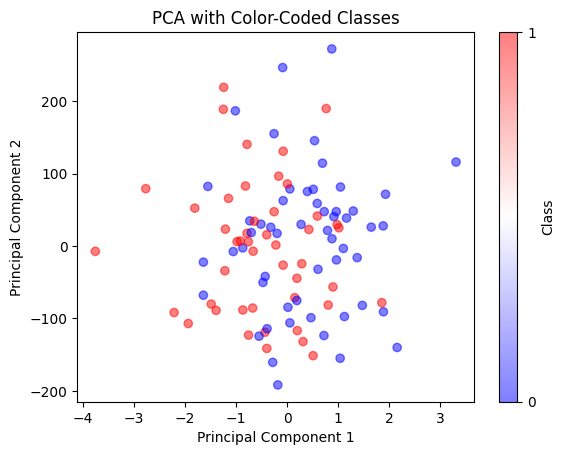

In [ ]:
# Assuming you have principal_component_scores and y defined
colors = ['red', 'blue']
scatter = plt.scatter(principal_component_scores[:, 0], principal_component_scores[:, 1], c=y, cmap='bwr', alpha=0.5)
plt.colorbar(scatter, ticks=[0, 1], label='Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Color-Coded Classes')
plt.show()

## Loadings of the Principal Components

Feature importance in PCA can be assessed by looking at the loadings of the principal components. These loadings indicate the contribution of each original feature to the principal components. Loadings are obtained by examining the eigenvectors of the covariance matrix.

Here are the steps to assess feature importance in PCA:

1. Compute the PCA and obtain the eigenvectors (principal component loadings) and eigenvalues.
2. Consider the first few principal components that explain a significant amount of the variance in the data (e.g., the first one or two principal components).
3. Examine the loadings (eigenvectors) of these principal components to see which features contribute the most to these components.
4. Features with high absolute loadings in the first few principal components are the most important ones, as they contribute significantly to explaining the variance in the data.

Here's an example in Python to illustrate this:

```python
import numpy as np

# Assuming you have already computed the PCA and have the eigenvectors and eigenvalues
eigenvalues, eigenvectors = compute_principal_components(compute_covariance_matrix(standardize_data(X)))

# Assuming you're interested in the first principal component
pc1_loadings = eigenvectors[:, -1] # Loadings of the first principal component

# Print the loadings for each feature
feature_names = ["x1", "x2", "x3", "x4", "x5"]
for feature, loading in zip(feature_names, pc1_loadings):
    print(f"{feature}: {loading}")

# Identify the feature with the highest absolute loading
important_feature_index = np.argmax(np.abs(pc1_loadings))
important_feature = feature_names[important_feature_index]
print(f"The most important feature is: {important_feature}")
```

In this example, we examine the loadings of the first principal component. We print the loadings for each feature and identify the feature with the highest absolute loading as the most important one.

Keep in mind that PCA focuses on the variance explained by the principal components, so the importance of a feature is determined by its contribution to the variance of the data. This might not directly align with other definitions of feature importance that consider classification accuracy or regression performance.

In [ ]:
# Assuming you're interested in the first principal component
pc1_loadings = eigenvectors[:, -1] # Loadings of the first principal component

# Print the loadings for each feature
feature_names = ["x1", "x2", "x3"]
for feature, loading in zip(feature_names, pc1_loadings):
    print(f"{feature}: {loading}")

x1: -0.6798701939874915
x2: 0.450682019737755
x3: -0.5784999882562729


In [ ]:
# Identify the feature with the highest absolute loading
important_feature_index = np.argmax(np.abs(pc1_loadings))
important_feature = feature_names[important_feature_index]
print(f"The most important feature is: {important_feature}")

The most important feature is: x1


## Feature Importance

This code calculates a measure of feature importance by taking the dot product of the absolute values of the eigenvectors (rounded to three decimal places) and the eigenvalues. This results in a weighted sum of the feature contributions for each principal component.

Here's a breakdown of the operations in the code:

1. `np.abs(eigenvectors)` computes the absolute values of the elements in the `eigenvectors` matrix, which is used to disregard the direction of the eigenvector components.

2. `np.round(..., 3)` rounds the absolute values of the eigenvectors to three decimal places.

3. `np.dot(..., eigenvalues)` calculates the dot product of the rounded absolute eigenvectors and the eigenvalues. This operation can be seen as a weighted sum, where the eigenvalues serve as weights. By multiplying the eigenvectors by the eigenvalues, the importance of each feature is weighted by the amount of variance explained by the corresponding principal component.

The resulting array, `feature_importance`, contains the importance scores for each feature based on the PCA results. Features with higher importance scores contribute more to the variance of the data, as captured by the principal components.

It is important to note that this approach considers both the contribution of each feature to the principal components (eigenvectors) and the amount of variance explained by each principal component (eigenvalues) in determining the feature importance.

In [ ]:
import pandas as pd

Recall earlier we check the magnitude of the loadings to see what the important $x$ is from the loadings of *ONE* principal components.

In [ ]:
pc1_loadings = np.abs(eigenvectors[:, -1]) # Loadings of the first principal component
feature_names[np.argmax(pc1_loadings)]

'x1'

Now let's use all the loadings. Note that the loadings for the first pincipal component is always the highest so this sets of loadings have a larger effect to the final result.

In [ ]:
feature_importance = np.dot(np.round(np.abs(eigenvectors), 3), eigenvalues)

In [ ]:
feature_names

['x1', 'x2', 'x3']

In [ ]:
final_feature_importance_table = pd.DataFrame(feature_importance, index=feature_names)
final_feature_importance_table

,0
x1,1.489438
x2,1.651726
x3,1.748404


It points to the correct $x$ with highest variance.